In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:

df = pd.read_csv('spam.csv',encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# 1 - Data Preprocessing

In [107]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [109]:
# dropping the below 3 columns as they mostly contain null values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [110]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [111]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [112]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [113]:
df.describe()

,target,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [114]:
# now converting the target column text values into numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])

In [115]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [116]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [117]:
df.duplicated().sum()

403

In [118]:
df.shape

(5572, 2)

In [119]:
df=df.drop_duplicates(keep='first')

In [120]:
df.duplicated().sum()

0

In [121]:
df.shape

(5169, 2)

# 2 - EDA

In [122]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [123]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

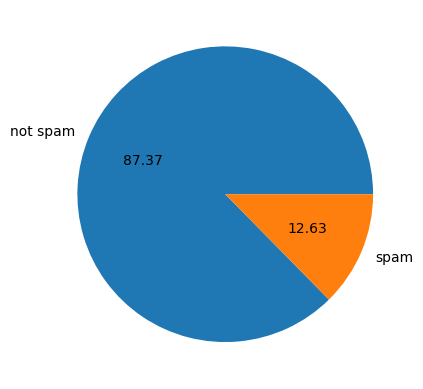

In [124]:
plt.pie(df['target'].value_counts(),labels=['not spam','spam'],autopct='%.2f')
plt.show()

In [125]:
# it shows that the data is imbalanced

In [126]:
import nltk
! pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\it
[nltk_data]     zone\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [127]:
df['num_characters']=df['text'].apply(len)
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


C:\Users\it zone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\it zone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

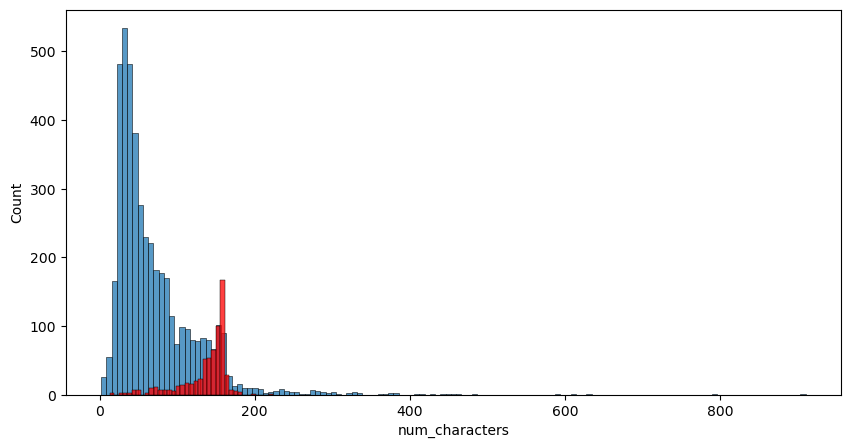

In [128]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

C:\Users\it zone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\it zone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\it zone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\it zone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass 

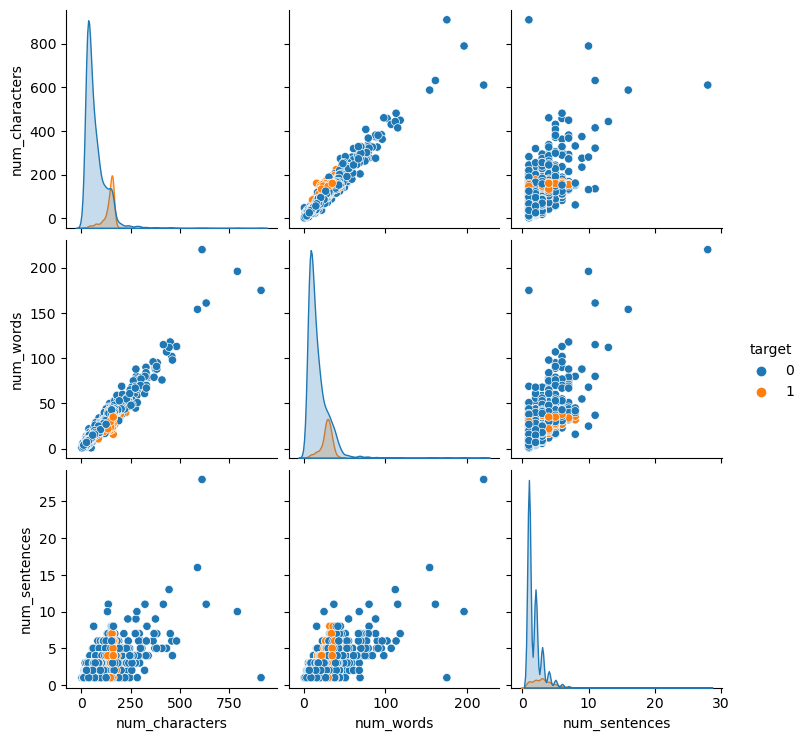

In [129]:
sns.pairplot(df,hue='target')

In [130]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<Axes: >

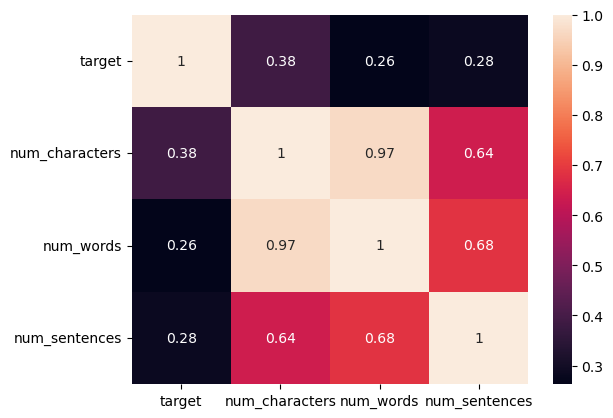

In [131]:
sns.heatmap(numeric_df.corr(),annot=True)

# Text Preprocessing
Lower case--------
Tokenization--------
Removing special characters--------
Removing stop words and punctuation--------
Stemming

In [132]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps=PorterStemmer()

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return ' '.join(y)

In [133]:
transform_text('Hello htransform_text("I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today.how are you doing?')

'hello gon na home soon want talk stuff anymor tonight k cri enough'

In [134]:
df['transformed_text']=df['text'].apply(transform_text)

In [135]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [136]:
from wordcloud import WordCloud
wc=WordCloud(min_font_size=10,width=500,height=500,background_color='white')

In [137]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

In [138]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

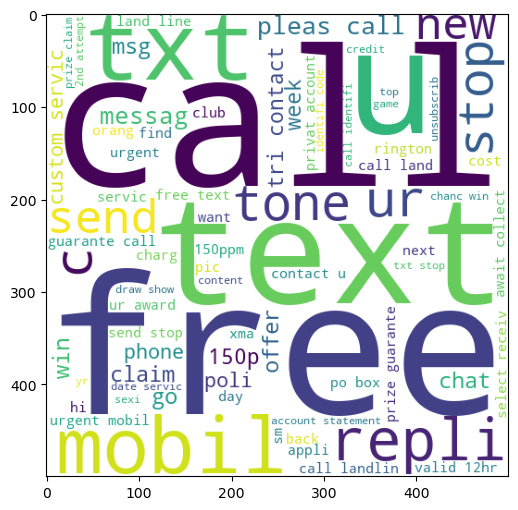

In [139]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

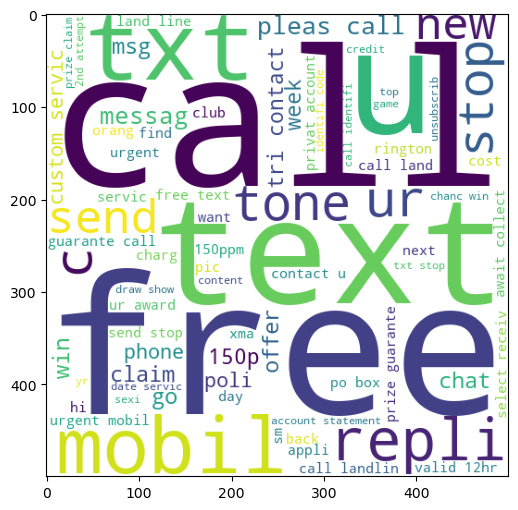

In [140]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [141]:
# now we will extract the words of both spam and not spam emails to find their frequency and other useful data
not_spam_corpus=[]
for msgs in df[df['target']==0]['transformed_text'].tolist():
    for words in msgs.split():
        not_spam_corpus.append(words)

In [142]:
len(not_spam_corpus)

35394

In [143]:
spam_corpus=[]
for msgs in df[df['target']==1]['transformed_text'].tolist():
    for words in msgs.split():
        spam_corpus.append(words)

In [144]:
len(spam_corpus)

9939

In [145]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30)).head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


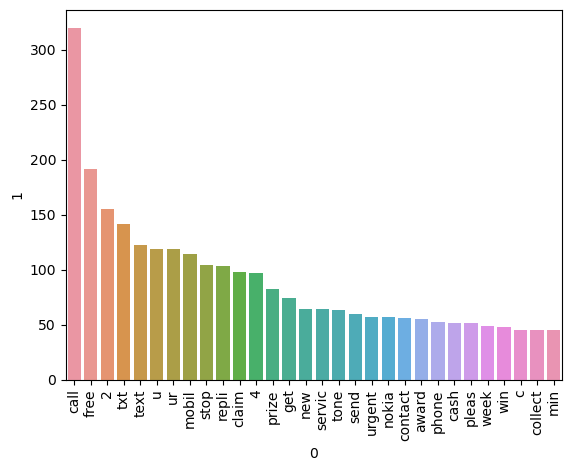

In [146]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

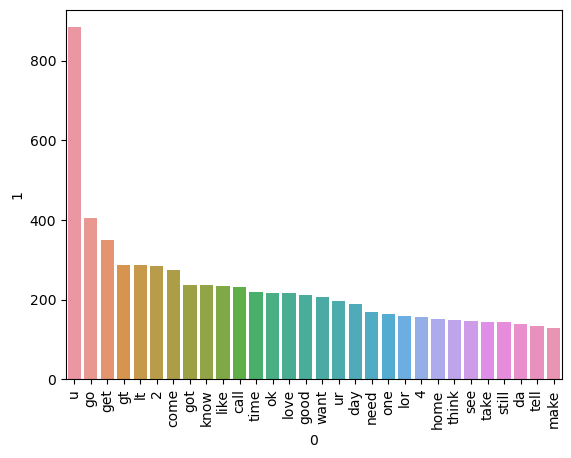

In [147]:
sns.barplot(x=pd.DataFrame(Counter(not_spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(not_spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [148]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [149]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)


In [150]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [151]:
X.shape

(5169, 3000)

In [152]:
y=df['target'].values

In [153]:
y.shape

(5169,)

In [154]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [155]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [156]:
#BernoulliNB

bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_pred1=bnb.predict(x_test)
print('accuracy_score:  ',accuracy_score(y_test,y_pred1))
print('confusion_matrix:  ',confusion_matrix(y_test,y_pred1))
print('precision_score:  ',precision_score(y_test,y_pred1))

accuracy_score:   0.9835589941972921
confusion_matrix:   [[895   1]
 [ 16 122]]
precision_score:   0.991869918699187


In [157]:
#GaussianNB

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred2=gnb.predict(x_test)
print('accuracy_score:  ',accuracy_score(y_test,y_pred2))
print('confusion_matrix:  ',confusion_matrix(y_test,y_pred2))
print('precision_score:  ',precision_score(y_test,y_pred2))

accuracy_score:   0.8694390715667312
confusion_matrix:   [[788 108]
 [ 27 111]]
precision_score:   0.5068493150684932


In [158]:
#MultinomialNB

mnb=MultinomialNB()
mnb.fit(x_train,y_train)
y_pred3=mnb.predict(x_test)
print('accuracy_score:  ',accuracy_score(y_test,y_pred3))
print('confusion_matrix:  ',confusion_matrix(y_test,y_pred3))
print('precision_score:  ',precision_score(y_test,y_pred3))

accuracy_score:   0.9709864603481625
confusion_matrix:   [[896   0]
 [ 30 108]]
precision_score:   1.0


In [159]:

#now checking on different models if we can improve its accuracy further as we have acheived 100% precision score in mnb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [160]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [161]:
clfs={
    'SVC':svc,
    'KNC':knc,
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [162]:
def train_classifier(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return np.round(accuracy,2),np.round(precision,2)


In [163]:
train_classifier(svc,x_train,x_test,y_train,y_test)


(0.98, 0.97)

In [164]:
accuracy_scores=[]
precision_scores=[]

for name,value in clfs.items():
    accuracy,precision=train_classifier(value,x_train,x_test,y_train,y_test)
    
    print( 'For ', name)
    print('Accuracy: ',accuracy)
    print('Precision: ',precision)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    

For  SVC
Accuracy:  0.98
Precision:  0.97
For  KNC
Accuracy:  0.91
Precision:  1.0
For  NB
Accuracy:  0.97
Precision:  1.0
For  DT
Accuracy:  0.93
Precision:  0.82
For  LR
Accuracy:  0.96
Precision:  0.97
For  RF
Accuracy:  0.97
Precision:  0.98
For  AdaBoost
Accuracy:  0.96
Precision:  0.93
For  BgC
Accuracy:  0.96
Precision:  0.87
For  ETC
Accuracy:  0.97
Precision:  0.97
For  GBDT
Accuracy:  0.95
Precision:  0.92


In [171]:
performance_df=pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [172]:
performance_df
    
    

,Algorithms,Accuracy,Precision
1,KNC,0.91,1.00
2,NB,0.97,1.00
5,RF,0.97,0.98
0,SVC,0.98,0.97
4,LR,0.96,0.97
8,ETC,0.97,0.97
6,AdaBoost,0.96,0.93
9,GBDT,0.95,0.92
7,BgC,0.96,0.87
3,DT,0.93,0.81


In [ ]:
# we need a model here whole precision is best and we are selecting here naive bayes model(multinomial)

In [173]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))